# Programa Ingenias+ Data Science

Un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

Si bien la recoleccion de los datos es uno de los pasos más importante de cualquier proyecto, el Data Scientist puede tener desde mucho hasta nada de control en esta etapa. Muy frecuentemente, los data scientist tienen que trabajar con datos guardados en archivos excel, o csv que proveen los clientes.

De cualquier manera, poder leer estos datos, organizarlos, darles el formato correcto, inspeccionarlos y manipularlos es una tarea escencial y requiere librerias especiales, que veremos a lo largo de esta Notebook.

<font size=5>  👩🏽‍🔬 Exploración de los datos 👩🏽‍💻</font>

Una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como <font color='#1ABC9C'>_"Analisis exploratorio de datos"_</font>.

Este análisis, que es parte de nuestra etapa de exploración y procesamiento de los datos, es muy importante ya que nos permitira descubrir patrones presentes en los datos. También permitira ver aquellos datos que se alejen del comportamiento esperado.

Cuando uno inicia un proyecto de Data Science el primer impulso es saltar a ajustar un modelo de machine learning. Sin embargo, es muy probable que no podamos explicar sus resultados, o no podamos entender que debemos ajustar si no hemos realizado previamente un analisis exploratorio.

Por este motivo, nos abocaremos a explorar nuestros datos en esta Notebook.

## Primera Parte: Describiendo los datos

Imaginemos la siguiente situación: Trabajas como data scientist en una empresa que comercializa distintos productos. La empresa tiene datos de ventas del Black Friday del año pasado. Tu Team leader te provee el dataset en el archivo `blackfriday.csv` y te pide que pienses en que proyecto puede surgir de allí que tenga utilidad para la empresa.

In [2]:
#importa pandas
import pandas as pd
import numpy as np

Recordemos que la sintaxis para poder leer un archivo csv es:
    
`df = pd.read_csv('archivo.csv', delimiter=',')`

Aunque muchas veces se omite el `delimiter` si el archivo esta separado por comas.

Lee el archivo csv `bkackfriday.csv` usando `pandas`. Guardalo en una variable llamada `blackfriday`.

In [3]:
blackfriday = pd.read_csv('blackfriday.csv')


Visualiza el DataFrame y observa cuantas filas y columnas tiene.

In [4]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [5]:
blackfriday.shape

(169161, 12)

Nombre y tipo de datos en las columnas contenidas en `blackfriday`

In [6]:
blackfriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,float64
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64


Chequea si tiene valores faltantes y ver las filas que los tienen.

In [8]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,16950
Age,8409
Occupation,25352
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,52519


In [9]:
blackfriday[blackfriday.isna().any(axis=1)]
# Devuelve todas las filas del DataFrame blackfriday que contienen al menos un valor nulo (NaN) en alguna de sus columnas.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169153,1002071,P00345842,NaN,46.0,7.0,C,1,1.0,2.0,8.0,14.0,13251.0
169154,1002071,P00368142,M,NaN,7.0,C,1,1.0,2.0,15.0,NaN,13076.0
169155,1002071,P00212942,NaN,NaN,7.0,C,1,1.0,5.0,NaN,NaN,8832.0
169159,1002071,P00065442,M,48.0,7.0,C,1,1.0,8.0,16.0,NaN,7947.0


In [10]:
blackfriday[blackfriday['Gender'].isna()]
# Devuelve todas las filas del DataFrame blackfriday donde la columna Gender tiene un valor nulo (NaN).

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2,1000001,P00087842,NaN,15.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
24,1000008,P00303442,NaN,26.0,12.0,C,4+,1.0,1.0,8.0,14.0,11927.0
38,1000010,P00155442,NaN,39.0,NaN,B,4+,1.0,1.0,11.0,15.0,15212.0
40,1000010,P00087242,NaN,40.0,1.0,B,4+,1.0,14.0,NaN,NaN,7947.0
42,1000010,P00259342,NaN,41.0,1.0,B,4+,1.0,5.0,9.0,NaN,8718.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169133,1002067,P00199442,NaN,53.0,16.0,B,2,0.0,5.0,9.0,NaN,6963.0
169148,1002070,P00295942,NaN,40.0,6.0,A,0,0.0,2.0,5.0,15.0,12707.0
169153,1002071,P00345842,NaN,46.0,7.0,C,1,1.0,2.0,8.0,14.0,13251.0
169155,1002071,P00212942,NaN,NaN,7.0,C,1,1.0,5.0,NaN,NaN,8832.0


Detalles estadisticos de cada columna:

In [11]:
blackfriday.describe()

,User_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.691610e+05,160752.000000,143809.000000,169160.000000,169160.000000,116642.000000,51724.000000,165856.000000
mean,1.002867e+06,34.238268,8.081351,0.409104,5.293320,9.850680,12.661627,9308.941365
std,1.748957e+03,11.652641,6.540999,0.491670,3.738608,5.086884,4.118064,4978.815326
min,1.000001e+06,14.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001323e+06,26.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5851.000000
50%,1.002810e+06,32.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8053.000000
75%,1.004354e+06,42.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12059.250000
max,1.006040e+06,74.000000,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


Podemos ver tambien que valores o categorias estan incluidas en las columnas:

In [12]:
blackfriday["City_Category"].value_counts()

,count
City_Category,
B,71119
C,52225
A,45816


In [13]:
blackfriday["City_Category"].value_counts(normalize=True)

,proportion
City_Category,
B,0.420424
C,0.308731
A,0.270844


In [14]:
blackfriday["Marital_Status"].value_counts(normalize=True)

,proportion
Marital_Status,
0.0,0.590896
1.0,0.409104


In [15]:
blackfriday['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [16]:
blackfriday['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,59253
2,31311
3,29321
4+,26408
0,22867


In [18]:
# Ver la fila con NaN en Stay_In_Current_City_Years
blackfriday[blackfriday['Stay_In_Current_City_Years'].isna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
169160,1002072,P00200642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Elimino la fila por no contener registro
blackfriday = blackfriday.drop(index=169160)

In [20]:
# Limpia y convierte la columna 'Stay_In_Current_City_Years' a números enteros, reemplazando el texto '4+' por '4.
blackfriday['Stay_In_Current_City_Years'] = blackfriday['Stay_In_Current_City_Years'].str.replace('4+', '4', regex=False).astype(int)
# .astype(int) Convierte todos los valores (ya limpios) de tipo texto a tipo entero (int). Así '4' se convierte en 4.

In [21]:
# Realiza un filtro para seleccionar filas donde la columna City_Category sea 'A' y la columna Marital_Status sea 0, luego devuelve el valor máximo en la columna Purchase.
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()

23949.0

In [22]:
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].min()

185.0

In [23]:
blackfriday[(blackfriday["Gender"] == 'F') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()

23938.0

In [24]:
blackfriday.groupby(by=['City_Category', 'Gender'])['Purchase'].mean()

City_Category  Gender
A              F          8618.163478
               M          9015.191417
B              F          8538.688043
               M          9391.119160
C              F          9249.481426
               M         10015.723460
Name: Purchase, dtype: float64

In [25]:
# Crea una tabla de contingencia (o tabla cruzada) entre las columnas City_Category y Product_Category_1 del DataFrame blackfriday.
pd.crosstab(blackfriday["City_Category"], blackfriday["Product_Category_1"])

Product_Category_1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
City_Category,,,,,,,,,,,,,,,,,,
A,10929,2002,1542,986,13151,1652,382,9985,29,410,2126,332,488,157,525,839,50,231
B,17913,3187,2659,1586,19971,2623,511,14741,55,638,3301,514,708,182,800,1234,80,416
C,14512,2288,2083,1087,13727,1938,265,10680,43,535,2221,370,500,123,631,886,52,284


## Parte 2: ¿Cómo visualizo mis datos?

Para poder visualizar los datos y la relación entre las distintas variables, podemos usar dos librerias: `matplotlib` y `seaborn`.

Documentación:
- [matplotlib](https://matplotlib.org/3.1.1/contents.html)
- [seaborn](https://seaborn.pydata.org/)

- Importamos la libreria `matplotlib.pyplot` como `plt`
- Importamos la libreria seaborn como `sns`

In [26]:
#Importa las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Veamos algunos ejemplos de distintos graficos que se pueden obtener con estas librerias.

In [27]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,float64
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,int64
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64


#### Histogramas:

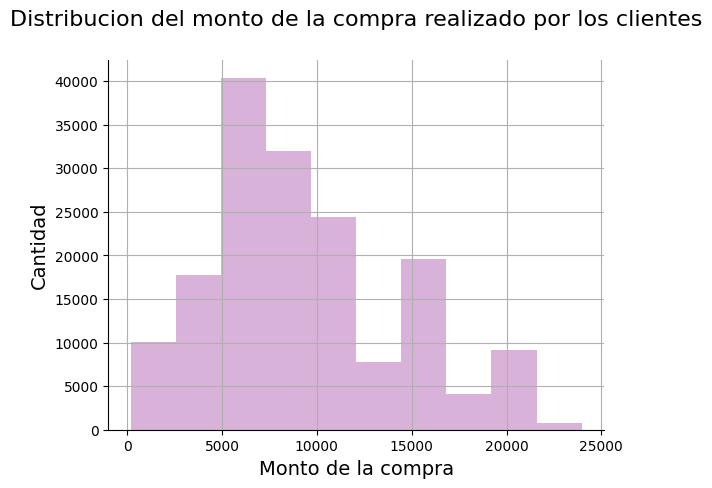

In [28]:
# Distribución de los montos de compra (Purchase) realizados por los clientes.
plt.figure()
plt.hist(blackfriday['Purchase'].dropna(), bins=10, color="purple", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Monto de la compra", size=14)
plt.title("Distribucion del monto de la compra realizado por los clientes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

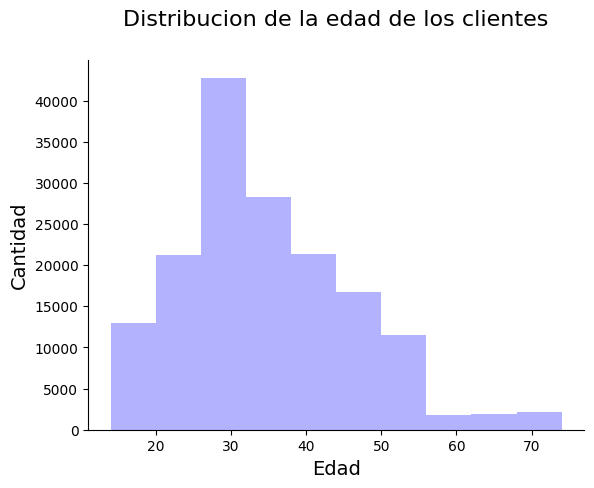

In [29]:
# Distribución de las edades de los clientes en el dataset blackfridayGrafico Age
plt.figure()
plt.hist(blackfriday['Age'].dropna(), bins=10, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Edad", size=14)
plt.title("Distribucion de la edad de los clientes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

Mi pagina favorita para elegir [colores](https://htmlcolorcodes.com/es/tabla-de-colores/)🎨 &nbsp;🖍

#### Distplot:

<Figure size 640x480 with 0 Axes>

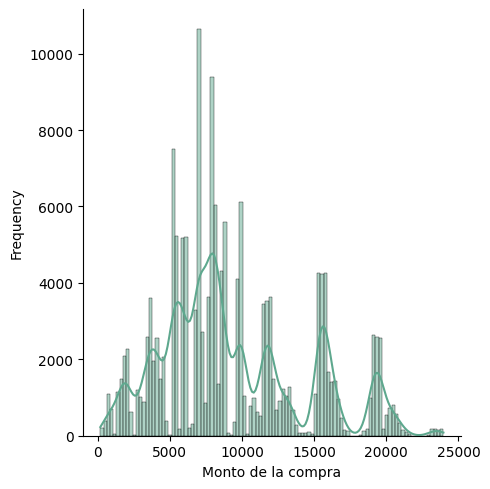

In [30]:
# Distribución de los montos de compra (Purchase) utilizando Seaborn.
plt.figure()
sns.displot(blackfriday["Purchase"], color="#5ea88e", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#### Boxplot:

In [32]:
boxplot_blackfriday = blackfriday.melt(id_vars='City_Category', value_vars=['Purchase'])
# Se utiliza la función melt() de Pandas para transformar el DataFrame blackfriday de formato ancho a formato largo.

In [33]:
boxplot_blackfriday.head()

,City_Category,variable,value
0,A,Purchase,8370.0
1,A,Purchase,15200.0
2,A,Purchase,1422.0
3,A,Purchase,1057.0
4,C,Purchase,7969.0


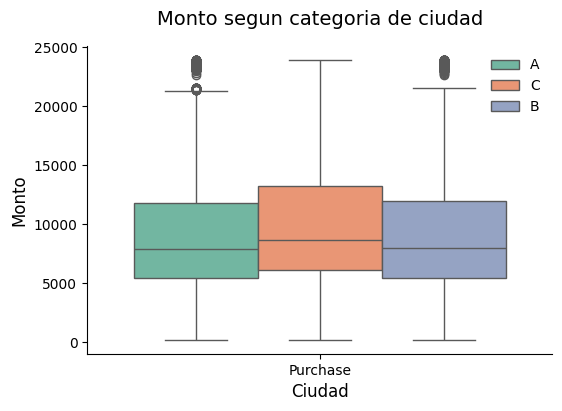

In [35]:
# Se genera un boxplot agrupado por ciudad para visualizar cómo varían los montos de compra según la categoría de ciudad.
plt.figure(figsize=(6, 4))
sns.boxplot(x="variable", y="value", data=boxplot_blackfriday, palette="Set2", hue='City_Category')

plt.title('Monto segun categoria de ciudad', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Ciudad', size=12)
plt.ylabel('Monto', size=12)
sns.despine()
plt.show()

#### Scaterplot:

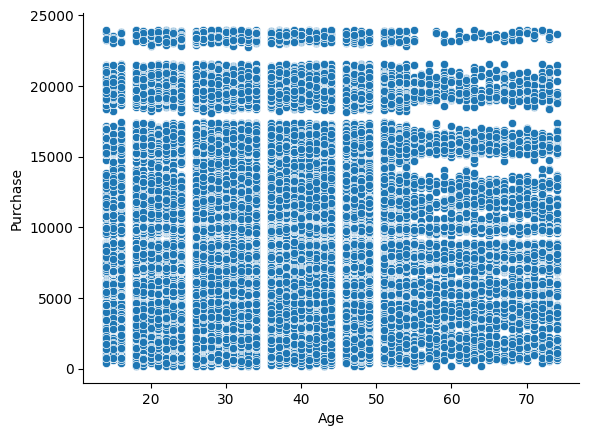

In [37]:
# Se genera un diagrama de dispersión (scatterplot) con Seaborn, donde se cruzan las columnas "Age" y "Purchase".
plt.figure()
sns.scatterplot(x="Age", y="Purchase",data=blackfriday)
sns.despine()
plt.show();

#### Countplot

Observa como se pueden ajustar la estetica del grafico (Vale para cualquier grafico).

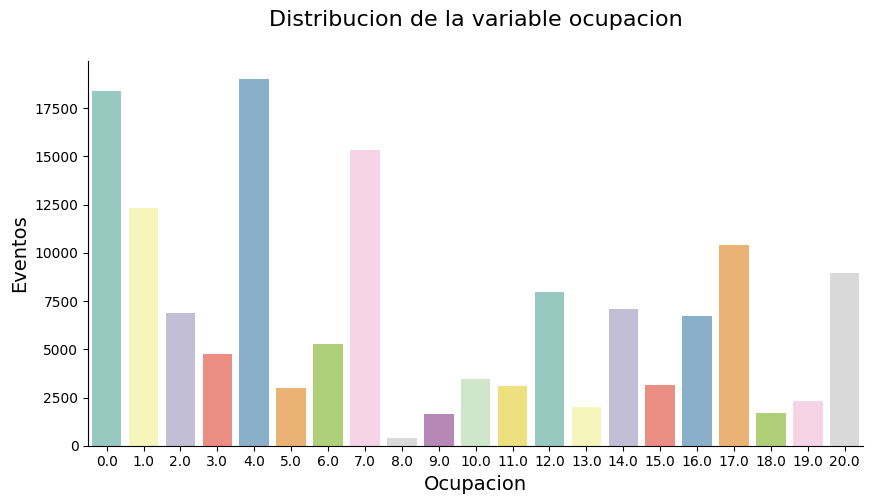

In [39]:
plt.figure(figsize=(10,5))

#Se genera un gráfico de barras que muestra cuántas veces aparece cada valor de la columna "Occupation" en el dataset blackfriday

sns.countplot(x="Occupation", data=blackfriday, hue="Occupation", palette="Set3", legend=False)

plt.ylabel("Eventos", size=14)
plt.xlabel("Ocupacion", size=14)
plt.title("Distribucion de la variable ocupacion", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

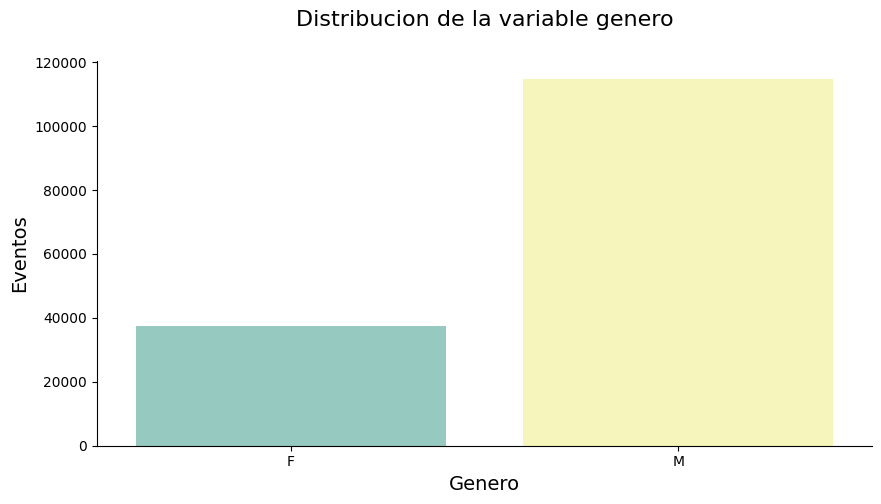

In [40]:
plt.figure(figsize=(10,5))

# Se genera correctamente un gráfico de barras que muestra cuántas personas hay por género en el dataset blackfriday. Es decir, cuántos hombres (M) y cuántas mujeres (F) participaron.

sns.countplot(x="Gender", data=blackfriday, hue="Gender", palette="Set3", legend=False)

plt.ylabel("Eventos", size=14)
plt.xlabel("Genero", size=14)
plt.title("Distribucion de la variable genero", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

#### Graficos solapados

<Figure size 640x480 with 0 Axes>

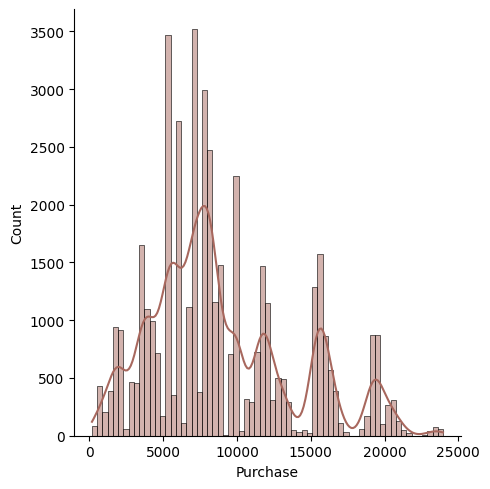

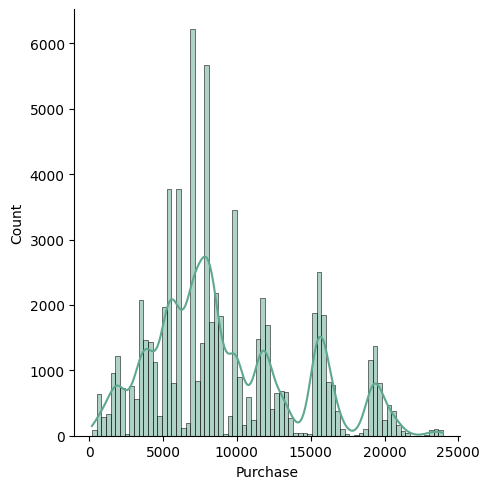

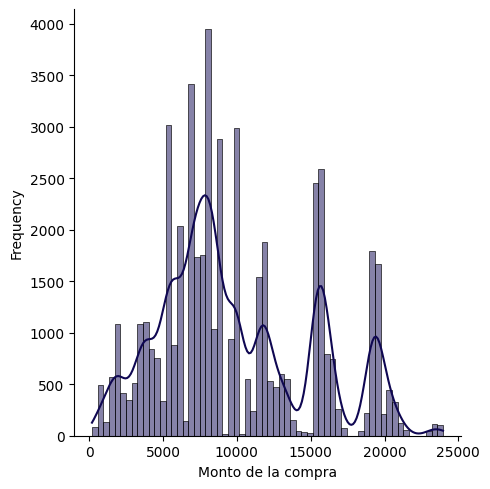

In [41]:
plt.figure()

# Se compara la distribución de Purchase entre las distintas categorías de ciudad (A, B y C). Se crean tres gráficos separados, no uno solo con las tres curvas superpuestas.

sns.displot(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show();

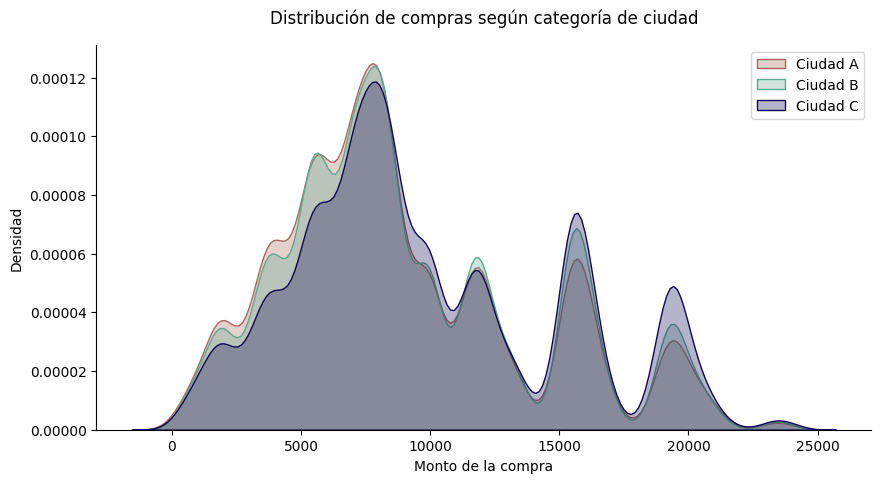

In [42]:
#Con las tres curvas en el mismo gráfico
plt.figure(figsize=(10, 5))

sns.kdeplot(data=blackfriday[blackfriday['City_Category'] == 'A'], x="Purchase", label="Ciudad A", color="#a8685e", fill=True, alpha=0.3)
sns.kdeplot(data=blackfriday[blackfriday['City_Category'] == 'B'], x="Purchase", label="Ciudad B", color="#5ea88e", fill=True, alpha=0.3)
sns.kdeplot(data=blackfriday[blackfriday['City_Category'] == 'C'], x="Purchase", label="Ciudad C", color="#0f0752", fill=True, alpha=0.3)

plt.xlabel('Monto de la compra')
plt.ylabel('Densidad')
plt.title("Distribución de compras según categoría de ciudad", pad=15)
plt.legend()
sns.despine()
plt.show()

#### Subplots

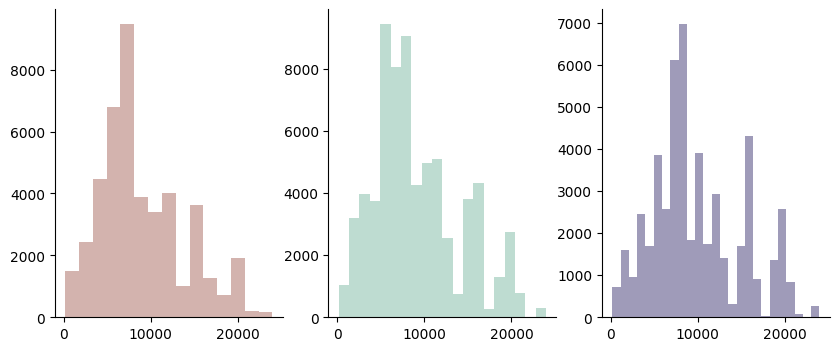

In [43]:
#Se crea un gráfico con subgráficos, donde cada gráfico muestra el histograma de compras de diferentes categorías de ciudad (A, B y C)
# Inicio subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
# Establezco colores
colors = np.arange(959)
# primer grafico
ax[0].hist(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", alpha=0.5, bins=15)
# segundo grafico
ax[1].hist(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", alpha=0.4, bins=20)
# tercer grafico
ax[2].hist(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", alpha=0.4,  bins=25)
# modifico primer grafico
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
# modifico segundo grafico
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# modifico tercer grafico
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
plt.show()

#### Pairplot

In [44]:
blackfriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

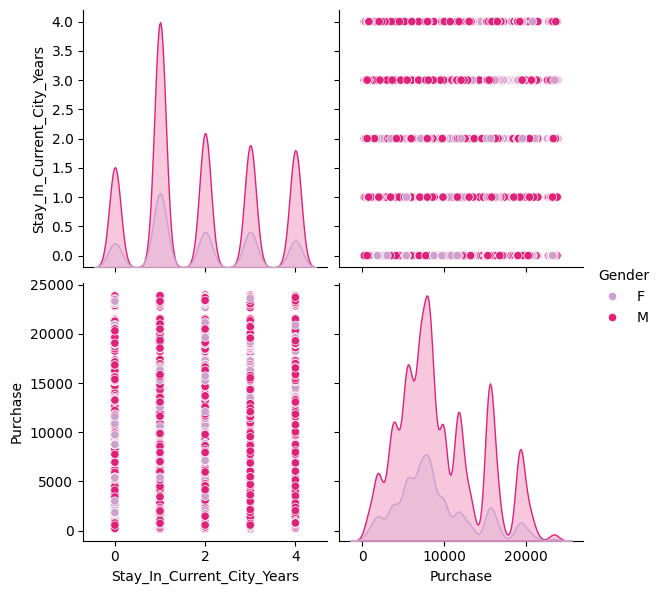

In [46]:
# Un gráfico de dispersión para cada par de variables en las columnas seleccionadas. En la diagonal, verás los histogramas o distribuciones de cada variable.
# Los puntos estarán coloreados según el género, lo que te permitirá visualizar cómo se distribuyen las observaciones de cada género en las diferentes combinaciones de variables.

sns.pairplot(blackfriday[['Stay_In_Current_City_Years', 'Purchase', 'Gender']], hue='Gender', palette='PuRd', height=3);

In [47]:
# Se calcula la matriz de correlación de Pearson entre las tres columnas seleccionadas (Age, Stay_In_Current_City_Years, y Purchase)
corr = blackfriday[['Age', 'Stay_In_Current_City_Years', 'Purchase']].corr(method = 'pearson')

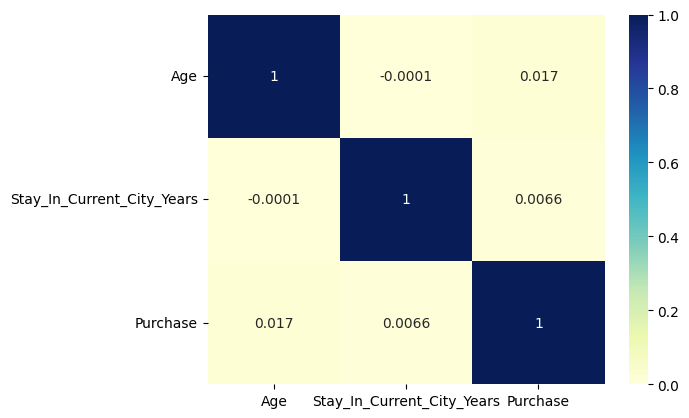

In [48]:
# Se genera un heatmap (mapa de calor) para visualizar la matriz de correlación de Pearson de manera más clara, donde se utiliza el mapa de colores 'YlGnBu'.
sns.heatmap(corr, cmap='YlGnBu', annot=True);

**Otros ejemplos de gráficos**: [Ejemplos en Matplotlib](https://matplotlib.org/3.1.0/gallery/index.html) y [Ejemplos en Seaborn](https://seaborn.pydata.org/examples/index.html)